In [1]:
#(Ignore this if you have installed Anaconda) LaTeX packages are needed for the display of formules.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# EXERCICE 1 Regression analysis of the investment data

### 1) Import the data

In [2]:
file_name = "invest.txt"
df = pd.read_csv(file_name, sep = " ")

df.head()

year     gnp  invest     cpi  interest
0  1968   873.4   133.3   82.54      5.16
1  1969   944.0   149.3   86.79      5.87
2  1970   992.7   144.2   91.45      5.95
3  1971  1077.6   166.4   96.01      4.88
4  1972  1185.9   195.0  100.00      4.50

### 2) Plot the data

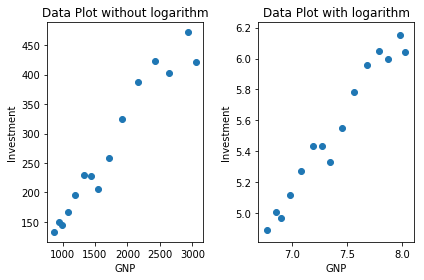

In [3]:
gnp_log = np.log(df["gnp"])
invest_log = np.log(df["invest"])

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title("Data Plot without logarithm")    
ax1.set_xlabel('GNP')
ax1.set_ylabel('Investment')
ax1.scatter(df["gnp"], df["invest"])

ax2 = fig.add_subplot(122)
ax2.set_title("Data Plot with logarithm")    
ax2.set_xlabel('GNP')
ax2.set_ylabel('Investment')
ax2.scatter(gnp_log, invest_log)

plt.tight_layout()

### 3) Intercept, slope and standard deviations of Investment and GNP

In [4]:
y_bar = np.mean(invest_log)
x_bar = np.mean(gnp_log)
num = gnp_log.count()

#Calculate the slope 
sum_slope_up = 0
sum_slope_down = 0
for i in range(0, num):
    sum_slope_up += (gnp_log[i] - x_bar)*(invest_log[i] - y_bar)
    sum_slope_down += (gnp_log[i] - x_bar) ** 2
slope_estim = sum_slope_up/sum_slope_down

#Calculate the intercept
intercept_estim = y_bar - slope_estim * x_bar

#Calculate the variances of intercept and slope
sum_temp_epsilon = 0
for i in range(0, num):
    sum_temp_epsilon += (invest_log[i] - (intercept_estim + slope_estim * gnp_log[i]))**2 

sigma_square = sum_temp_epsilon / (num - 2)
var_intercept = sigma_square * ((1/num) + (x_bar**2/sum_slope_down))
var_slope = sigma_square/sum_slope_down

#Calculate the determination coefficient
dc_up = 0
dc_down = 0
for i in range(0, num):
    y_hat = intercept_estim + slope_estim * gnp_log[i]
    dc_up += (y_hat - y_bar)**2
    dc_down += (invest_log[i] - y_bar)**2
r_square = dc_up / dc_down

print("The intercept is: " + str(intercept_estim))
print("The slope is: " + str(slope_estim))
print("The standard deviation of intercept is: " + str(np.sqrt(var_intercept)))
print("The standard deviation of slope is: " + str(np.sqrt(var_slope)))
print("the determination coefficient is: " + str(r_square))

The intercept is: -1.9635913352301833
The slope is: 1.015281401598871
The standard deviation of intercept is: 0.4095472716623082
The standard deviation of slope is: 0.055383060354852805
the determination coefficient is: 0.9627572956057855


### 4) Student-*t* test

In [5]:
from scipy.stats import t

test_student_value = slope_estim / np.sqrt(var_slope)
print("The value of the test statistic is: " + str(test_student_value))

p_value = (1 - t.cdf(test_student_value, num - 2))*2
print("The p-value is: " + str(p_value))

The value of the test statistic is: 18.33198445686668
The p-value is: 1.1363709973011282e-10


We can see that the *p*-value is really small, thus the null hypothesis $\mathcal{H}_{0}$ is rejected, $\beta_{1} \neq 0$.

### 5) The estimation for GNP value 1000

In [6]:
#The first input value of the following three functions needs a logarithm transform before inputing

def investment_estimation(gnp_log):
    return intercept_estim + slope_estim * gnp_log

def confidence_interval(gnp_log, alpha):
    temp = t.ppf(1 - alpha / 2, num - 2) * np.sqrt(sigma_square) * np.sqrt(1 / num + (gnp_log - x_bar)**2 / sum_slope_down)
    return (investment_estimation(gnp_log) - temp, investment_estimation(gnp_log) + temp)

def prediction_interval(gnp_log, alpha):
    temp = t.ppf(1 - alpha / 2, num - 2) * np.sqrt(sigma_square) * np.sqrt((num + 1) / num + (gnp_log - x_bar)**2 / sum_slope_down)
    return (investment_estimation(gnp_log) - temp, investment_estimation(gnp_log) + temp)

print("The estimated investment for GNP value 1000 is: " + str(investment_estimation(np.log(1000))))
print("The confidence interval for 90% level is: " + str(confidence_interval(np.log(1000), 0.1)))
print("The prediction interval for 90% level is: " + str(prediction_interval(np.log(1000), 0.1)))

The estimated investment for GNP value 1000 is: 5.0497241263168
The confidence interval for 90% level is: (4.988222845971109, 5.111225406662491)
The prediction interval for 90% level is: (4.882820023438679, 5.216628229194921)


### 6) The plots of regression 

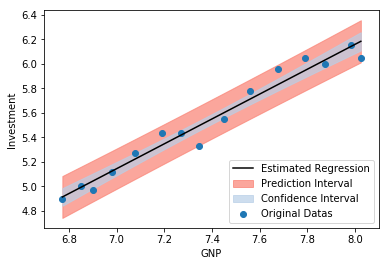

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Generate all the plots needed, the alpha value in ax.fill_between() 
#is to set a certain transparency so that no plot will be coverd by another
ax.plot(gnp_log, investment_estimation(gnp_log), color = "#000000", label = "Estimated Regression")
ax.fill_between(gnp_log, prediction_interval(gnp_log, 0.1)[0], prediction_interval(gnp_log, 0.1)[1], 
                color="#fa8072", label = "Prediction Interval", alpha = 0.7)
ax.fill_between(gnp_log, confidence_interval(gnp_log, 0.1)[0], confidence_interval(gnp_log, 0.1)[1], 
                color="#b9cfe7", label = "Confidence Interval", alpha = 0.7)
ax.scatter(gnp_log, invest_log, label = "Original Datas")
ax.set_xlabel("GNP")
ax.set_ylabel("Investment")

#Get the range of the ordinate in this question for the question 8
ylim_q6 = ax.get_ylim()

ax.legend(loc = 'lower right')



### 7) Prediction using existing functionality

In [8]:
from sklearn.linear_model import LinearRegression

#reform the data in the form of numpy arraries for the input
gnp_log_array = np.asarray(gnp_log)
gnp_log_array_reshaped = gnp_log_array.reshape(-1, 1)
invest_log_array = np.asarray(invest_log)

#The regression
reg = LinearRegression().fit(gnp_log_array_reshaped, invest_log_array)

#Calculate and print the value to be verified
print("The intercept obtained is: " + str(reg.intercept_))
print("The slope obtained is: " + str(reg.coef_[0]))
print("The determination coefficient obtained is: " 
      + str(reg.score(gnp_log_array_reshaped, invest_log_array)))
print("The predicted investment for GNP of 1000 is: " + str(reg.predict(np.log(1000))[0]))

The intercept obtained is: -1.9635913352301815
The slope obtained is: 1.015281401598871
The determination coefficient obtained is: 0.9627572956057855
The predicted investment for GNP of 1000 is: 5.049724126316802


We can clearly see that all the four values we have got here are the same as what we have got in question 3) and 5), they coincide. 

### 8) The new plot

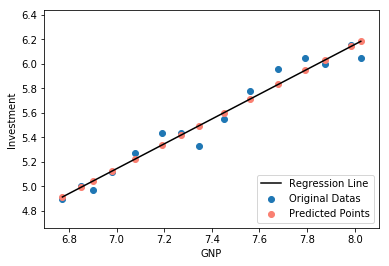

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(gnp_log, invest_log, label = "Original Datas")
ax.scatter(gnp_log, reg.predict(gnp_log_array_reshaped), label = "Predicted Points", color = "#fa8072")
ax.plot(gnp_log, reg.coef_[0] * gnp_log + reg.intercept_, 
        color = "#000000", label = "Regression Line")
ax.set_xlabel("GNP")
ax.set_ylabel("Investment")

#Apply the same range of ordinate like in question 6
ax.set_ylim(ylim_q6)

ax.legend(loc = 'lower right')

From above, we can see that this graphic coincide with the corresponding elements from the one in Step 6.

### 9) The Gram matrix

In [11]:
from numpy.linalg import inv, eig
#construct the matrix X
interest = df["interest"]
temp_array = np.vstack([np.ones(num), gnp_log_array, interest])
X = np.asmatrix(temp_array).T

#Calculate the Gram matrix
gram_matrix = X.T * X / num
print("The Gram matrix is:\n" + str(gram_matrix))
print("The eigenvector is:\n" + str(eig(gram_matrix)[0]))

The Gram matrix is:
[[ 1.          7.38352141  7.45266667]
 [ 7.38352141 54.68323179 55.94590287]
 [ 7.45266667 55.94590287 62.92371333]]
The eigenvector is:
[1.15858127e+02 1.21579798e-03 2.74760242e+00]


We can see that none of the eigenvalues of the Gram matrix $\hat{G}_{n}$ is $0$, so $\hat{G}_{n}$ is of full rank.

### 10) Coefficients for the new estimation 

According to the Rank–nullity theorem, as $\hat{G}_{n}$ is of full rank, we have $ker(X)=ker(\hat{G}_{n})=\{0\}$, so using the $Proposition 1$ in the course, we have the OLS estimator $$\hat{\beta}_{n} = (X^{T}X)^{-1}X^{T}Y$$ and in order to calculate the $p$-value, the matrix $C = \hat{\sigma}^{2}(X^{T}X)^{-1}$ is used to obtain the variance.

In [12]:
#Construct the Y matrix 
Y = np.asmatrix(invest_log_array).T

#Calculate the beta_hat (regression coeffients)
beta_hat = inv(X.T * X) * X.T * Y
print("The regression coeffients are: " 
      + str(beta_hat[0,0]) + ", " + str(beta_hat[1,0]) + ", " + str(beta_hat[2,0]))

#To calculate p-values, we calculate the C matrix firstly
sum_temp_epsilon_new = 0
for i in range(0, num):
    sum_temp_epsilon_new += (invest_log[i] - (beta_hat[0,0] + beta_hat[1,0] * gnp_log[i] + beta_hat[2,0] * interest[i]))**2
sigma_square_new = sum_temp_epsilon_new / (num - 3)
C = sigma_square_new * inv(X.T * X)
p_value_0 = (1 - t.cdf(np.abs(beta_hat[0,0] / np.sqrt(C[0,0])), num - 3))*2
p_value_1 = (1 - t.cdf(np.abs(beta_hat[1,0] / np.sqrt(C[1,1])), num - 3))*2
p_value_2 = (1 - t.cdf(np.abs(beta_hat[2,0] / np.sqrt(C[2,2])), num - 3))*2
print("The corresponding p-values are: " 
      + str(p_value_0) + ", " + str(p_value_1) + ", " + str(p_value_2))

# Calculate the determination coefficient
dc_up_new = 0
dc_down_new = 0
for i in range(0, num):
    y_hat = beta_hat[0,0] + beta_hat[1,0] * gnp_log[i] + beta_hat[2,0] * interest[i]
    dc_up_new += (y_hat - y_bar)**2
    dc_down_new += (invest_log[i] - y_bar)**2
r_square = dc_up_new / dc_down_new
print("The determination coefficient is: " + str(r_square))

The regression coeffients are: -2.1804547259122575, 1.0512426913198811, -0.006528879406102708
The corresponding p-values are: 0.006438367050919602, 2.5995168484449493e-07, 0.6780071418822775
The determination coefficient is: 0.9633108306726905


As we can see from the $p$-values and the determination coefficient we got, the $p$-value of $\beta_{2}$ is way higher than the statistical significance, the **interest** is not very significant feature for the estimation of the **investment**, but the determination coefficient is still nearly 1, the overall model is quite significant.

### 11) Investment prediction and intervals 

In [16]:
#Reconstruct new functions for the new covariate 
def new_investment_estimation(gnp_log, interest):
    return beta_hat[0,0] + beta_hat[1,0] * gnp_log + beta_hat[2,0] * interest

def new_confidence_interval(gnp_log, interest, alpha):
    x = np.asmatrix([1, gnp_log, interest]).T
    temp = t.ppf(1 - alpha / 2, num - 3) * np.sqrt(sigma_square_new * x.T * inv(X.T * X) * x)
    return (new_investment_estimation(gnp_log, interest) - temp[0,0], new_investment_estimation(gnp_log, interest) + temp[0,0])

def new_prediction_interval(gnp_log, interest, alpha):
    x = np.asmatrix([1, gnp_log, interest]).T
    temp = t.ppf(1 - alpha / 2, num - 3) * np.sqrt(sigma_square_new * (1 + x.T * inv(X.T * X) * x))
    return (new_investment_estimation(gnp_log, interest) - temp[0,0], new_investment_estimation(gnp_log, interest) + temp[0,0])

print("The estimated investment for GNP value 1000 is: " + str(new_investment_estimation(np.log(1000), 10)))
print("The confidence interval for 99.9% level is: " + str(new_confidence_interval(np.log(1000), 10, 0.001)))
print("The prediction interval for 99.9% level is: " + str(new_prediction_interval(np.log(1000), 10, 0.001)))

The estimated investment for GNP value 1000 is: 5.015983730483013
The confidence interval for 99.9% level is: (4.640184036688412, 5.391783424277614)
The prediction interval for 99.9% level is: (4.473803343640594, 5.558164117325432)


### 12) The new 3D plot

Text(0.5,0,'Investment')

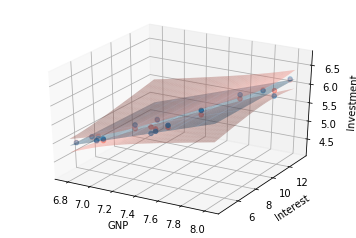

In [14]:
from mpl_toolkits.mplot3d import Axes3D

#initialize and draw data points and predicted points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gnp_log, interest, invest_log, label = "Data Points")
ax.scatter(gnp_log, interest, new_investment_estimation(gnp_log, interest), color = "#fa8072", label = "Prediction Points")

#create 100 value of GNP and Interest from their minimum and maximum
x = np.linspace(np.amin(gnp_log), np.amax(gnp_log), 100)
y = np.linspace(np.amin(interest), np.amax(interest), 100)

#Calculate the down limit and up limit of the confidence intervals. 100*100 value pairs of GNP and Interest are used.
min_confidence_array = np.zeros((100, 100))
max_confidence_array = np.zeros((100, 100))
for i in x:
    for j in y:
        min_confidence_array[np.where(x == i)[0][0]][np.where(y == j)[0][0]] = min(new_confidence_interval(i, j, 0.001))
        max_confidence_array[np.where(x == i)[0][0]][np.where(y == j)[0][0]] = max(new_confidence_interval(i, j, 0.001))

#make the 100*100 value pairs of GNP and Interest
x, y = np.meshgrid(x, y)

#plot the regression plane
ax.plot_surface(x, y, new_investment_estimation(x, y), label = "Regression Plane", alpha = 0.4)

#plot the confidence intervals
ax.plot_surface(x, y, min_confidence_array.T, alpha = 0.4, color = "#fa8072", label = "Confidence interval")
ax.plot_surface(x, y, max_confidence_array.T, alpha = 0.4, color = "#fa8072")

ax.set_xlabel("GNP")
ax.set_ylabel("Interest")
ax.set_zlabel("Investment")

#Uncomment the function below to rotate the generated figure
#ax.view_init(30, 30)


Data points and the confidence intervals are shown in red, predicted points and the regression plane are shown in blue.

### 13) Verification using existing functionality

In [15]:
#reform the data in the form of numpy arraries for the input
train_array = np.vstack([gnp_log_array, interest]).T
#The regression
reg = LinearRegression().fit(train_array, invest_log_array)

#Calculate and print the value to be verified
print("The regression coefficients obtained are: " + str(reg.intercept_) + str(reg.coef_[0]) + str(reg.coef_[1]))
print("The determination coefficient obtained is: " + str(reg.score(train_array, invest_log_array)))
print("The predicted investment for GNP of 1000, interest of 10 is: " + str(reg.predict(np.asarray([[np.log(1000), 10]]))[0]))

The regression coefficients obtained are: -2.18045472591140041.0512426913196595-0.006528879406068252
The determination coefficient obtained is: 0.9633108306726245
The predicted investment for GNP of 1000, interest of 10 is: 5.0159837304826835


We can see that the estimated regression and determination coefficients, as well as the estimated value coincide with the ones obtained "by hand" in step **10)** and **11)**